# Proceso ETL del csv - Datos de Ordeña
---

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Si los archivos están en tu Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Use glob to find all CSV files within the directory
archivos = glob.glob('/content/drive/MyDrive/ConcentracionIA_bloque2/Vacas/Datos de ordeña/*.csv')
df_completo = pd.concat([pd.read_csv(f, header=1) for f in archivos], ignore_index=True)

display(df_completo.head())
df_completo.shape

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,RCS (* 1000 células / ml),Patada,Incompleto,Pezones no encontrados,Ubre,...,False.36,False.37,False.38,False.39,False.40,False.41,False.42,False.43,False.44,True.2
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,NaN,TD,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,NaN,"DI,DD,TI",NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,NaN,TD,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(99188, 112)

## Información del dataset inicial

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99188 entries, 0 to 99187
Columns: 112 entries, Hora de inicio to True.2
dtypes: float64(48), object(64)
memory usage: 84.8+ MB


### Renombre y droppeo de columnas  

In [ ]:
# Drop specified columns
columns_to_drop = ['Usuario', 'RCS (* 1000 células / ml)', 'Razón de la desviación']
df_dropped = df_completo.drop(columns=columns_to_drop)

# Rename DI and TD columns
rename_mapping = {
    'DI': 'DI - media de flujos',
    'DD': 'DD - media de flujos',
    'TI': 'TI - media de flujos',
    'TD': 'TT - media de flujos',

    'DI.1': 'DI - sangre',
    'DD.1': 'DD - sangre',
    'TI.1': 'TI - sangre',
    'TD.1': 'TT - sangre',

    'DI.2': 'DI - conductividad',
    'DD.2': 'DD - conductividad',
    'TI.2': 'TI - conductividad',
    'TD.2': 'TT - conductividad',

    'DI.3': 'DI - flujos',
    'DD.3': 'DD - flujos',
    'TI.3': 'TI - flujos',
    'TD.3': 'TT - flujos',

    'DI.4': 'DI - producciones',
    'DD.4': 'DD - producciones',
    'TI.4': 'TI - producciones',
    'TD.4': 'TT - producciones',

}
df_renamed = df_dropped.rename(columns=rename_mapping)

display(df_renamed.head())

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Patada,Incompleto,Pezones no encontrados,Ubre,Pezón,...,False.36,False.37,False.38,False.39,False.40,False.41,False.42,False.43,False.44,True.2
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,TD,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,"DI,DD,TI",NaN,NaN,1.0,DD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,TD,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_renamed.dtypes

,0
Hora de inicio,object
Acción,object
Duración (mm:ss),object
Producción (kg),float64
Número de ordeño,float64
...,...
False.41,object
False.42,object
False.43,object
False.44,object


### Checamos registros duplicados para eliminarlos si los hay

In [ ]:
# Check for duplicate rows
duplicates_before = df_renamed.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Drop duplicate rows
df_cleaned = df_renamed.drop_duplicates()

# Check for duplicate rows after dropping
duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

display(df_cleaned.head())

Number of duplicate rows before dropping: 15
Number of duplicate rows after dropping: 0


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Patada,Incompleto,Pezones no encontrados,Ubre,Pezón,...,False.36,False.37,False.38,False.39,False.40,False.41,False.42,False.43,False.44,True.2
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,TD,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,"DI,DD,TI",NaN,NaN,1.0,DD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,TD,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Create dummy variables for the specified columns, including NaNs
df_cleaned = pd.get_dummies(df_cleaned, columns=['Patada', 'Incompleto', 'Pezones no encontrados'], dummy_na=True)

display(df_cleaned.head())

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,Pezón,DI - media de flujos,DD - media de flujos,TI - media de flujos,...,"Pezones no encontrados_DI,DD,TD","Pezones no encontrados_DI,DD,TI","Pezones no encontrados_DI,TD","Pezones no encontrados_DI,TI","Pezones no encontrados_DI,TI,TD",Pezones no encontrados_TD,Pezones no encontrados_TI,"Pezones no encontrados_TI,TD",Pezones no encontrados_Todos,Pezones no encontrados_nan
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,1.0,NaN,1.08,1.02,0.96,...,False,False,False,False,False,False,False,False,False,True
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,1.0,NaN,1.14,1.14,1.08,...,False,False,False,False,False,False,False,False,False,True
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,1.0,NaN,1.08,1.08,1.02,...,False,False,False,False,False,False,False,False,False,True
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,1.0,DD,1.14,1.02,1.02,...,False,False,False,False,False,False,False,False,False,True
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,1.0,NaN,1.20,1.08,1.14,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99173 entries, 0 to 99187
Columns: 154 entries, Hora de inicio to Pezones no encontrados_nan
dtypes: bool(48), float64(46), object(60)
memory usage: 85.5+ MB


## Parte II. Graficación
---

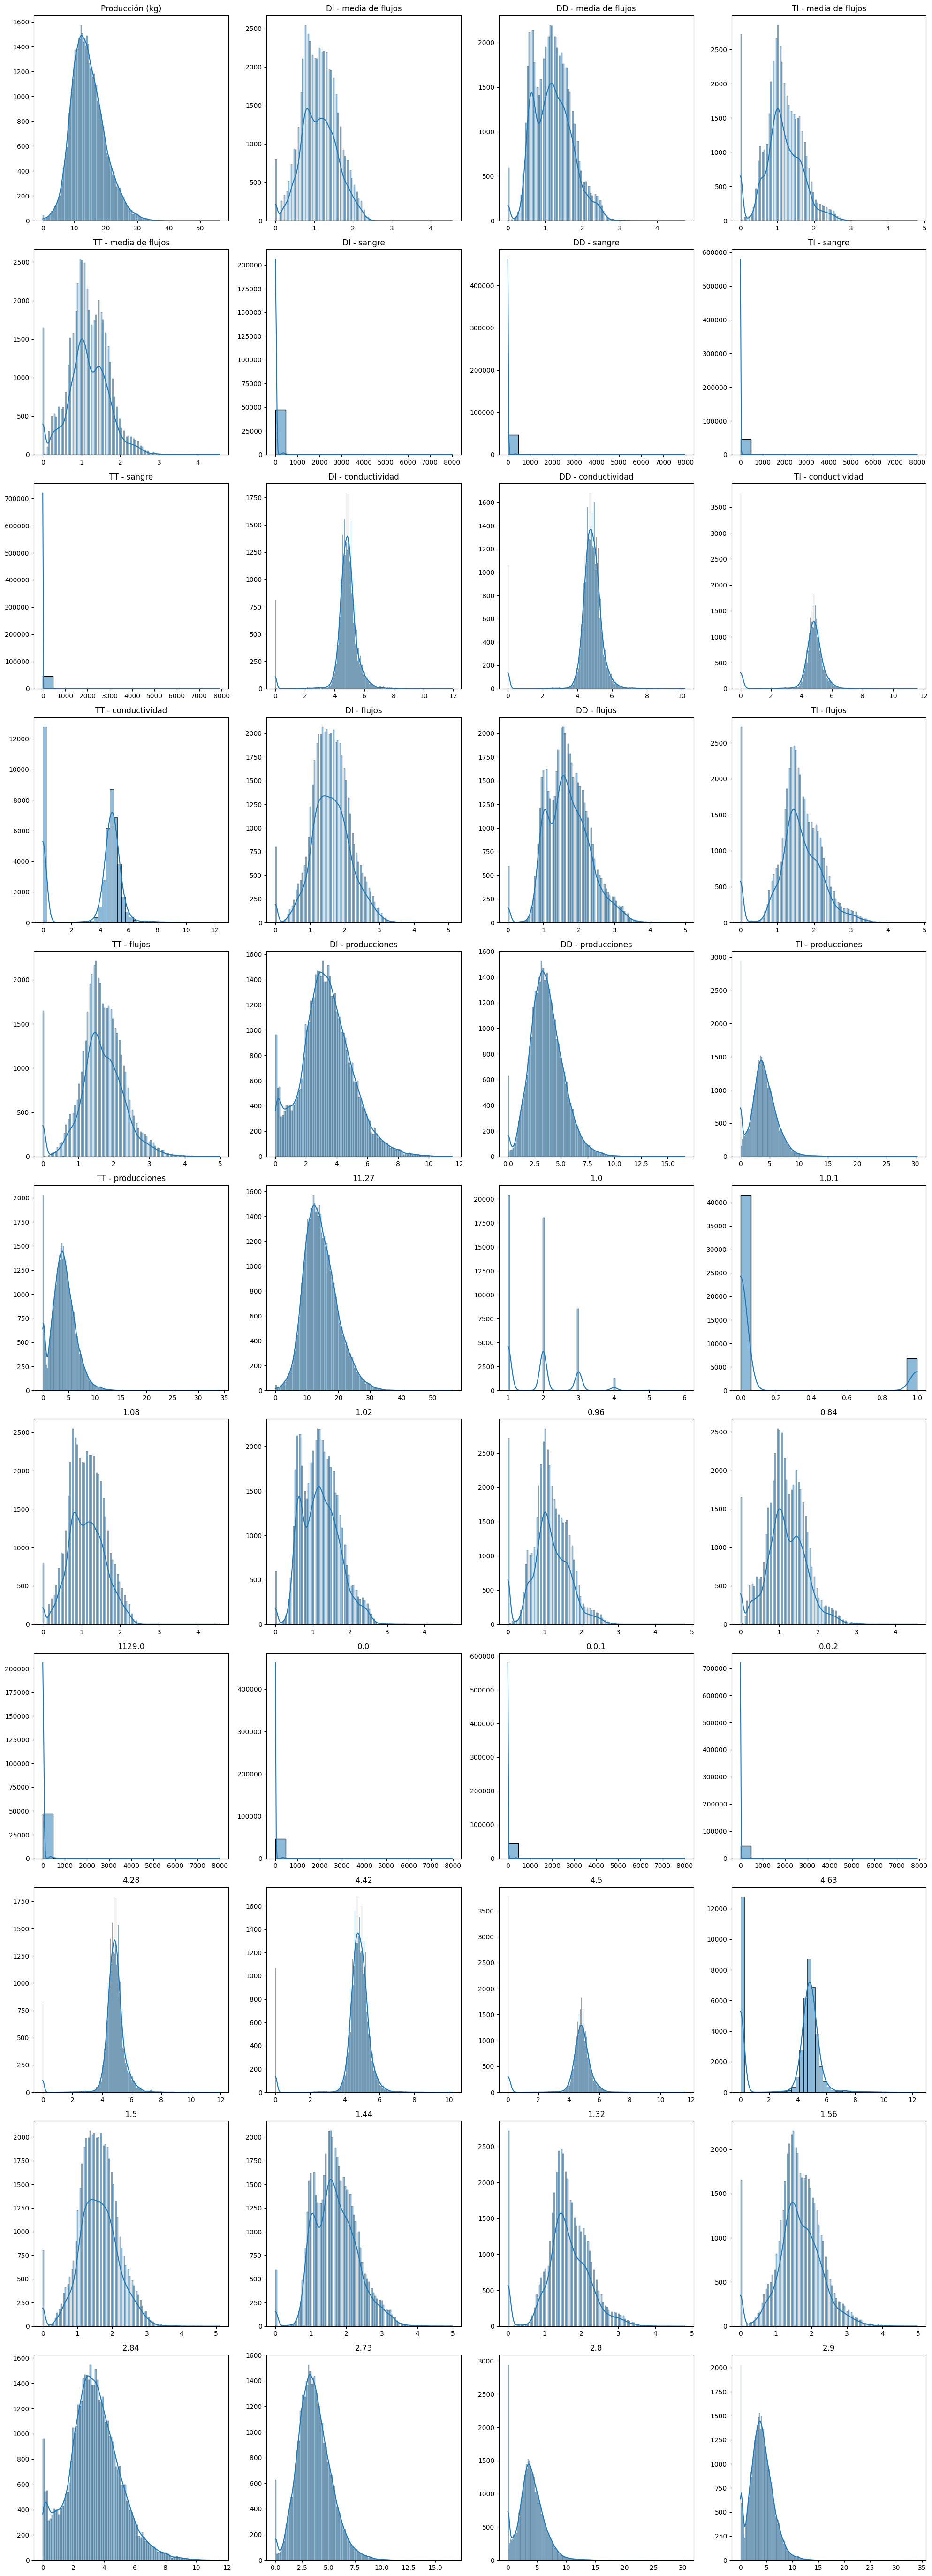

In [ ]:
# Select only numerical columns (excluding the newly created dummy variables)
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that were originally object types and converted to dummies
# We can identify them by checking the original object columns and removing the new boolean columns
original_object_cols = ['Hora de inicio', 'Acción', 'Duración (mm:ss)', 'Patada', 'Incompleto', 'Pezones no encontrados', 'Pezón', 'EO/PO', 'Destino Leche']
dummy_cols = [col for col in df_cleaned.columns if any(orig_col in col for orig_col in ['Patada', 'Incompleto', 'Pezones no encontrados']) and df_cleaned[col].dtype == 'bool']

numerical_cols_for_hist = [col for col in numerical_cols if col not in dummy_cols and col not in ['Ubre', 'Número de ordeño']]

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = (len(numerical_cols_for_hist) + n_cols - 1) // n_cols

# Create histograms for the selected numerical columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols_for_hist):
    sns.histplot(df_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

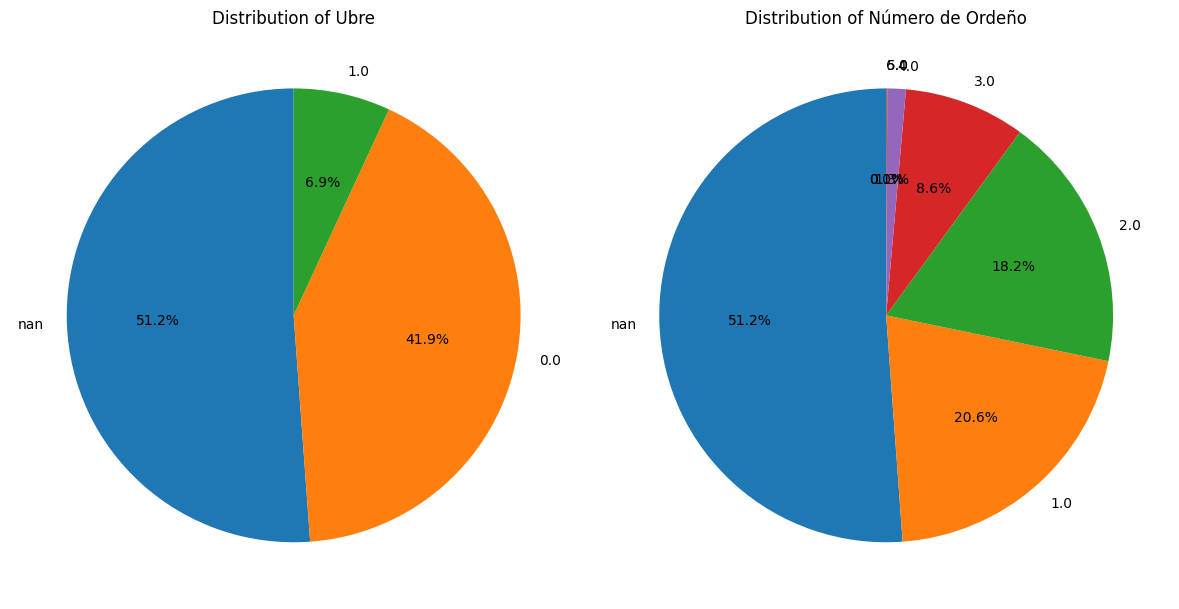

In [ ]:
# Create pie charts for 'Ubre' and 'Número de ordeño'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Ubre'
ubre_counts = df_cleaned['Ubre'].value_counts(dropna=False)
axes[0].pie(ubre_counts, labels=ubre_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Ubre')

# Pie chart for 'Número de ordeño'
numero_ordeno_counts = df_cleaned['Número de ordeño'].value_counts(dropna=False)
axes[1].pie(numero_ordeno_counts, labels=numero_ordeno_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Número de Ordeño')

plt.tight_layout()
plt.show()

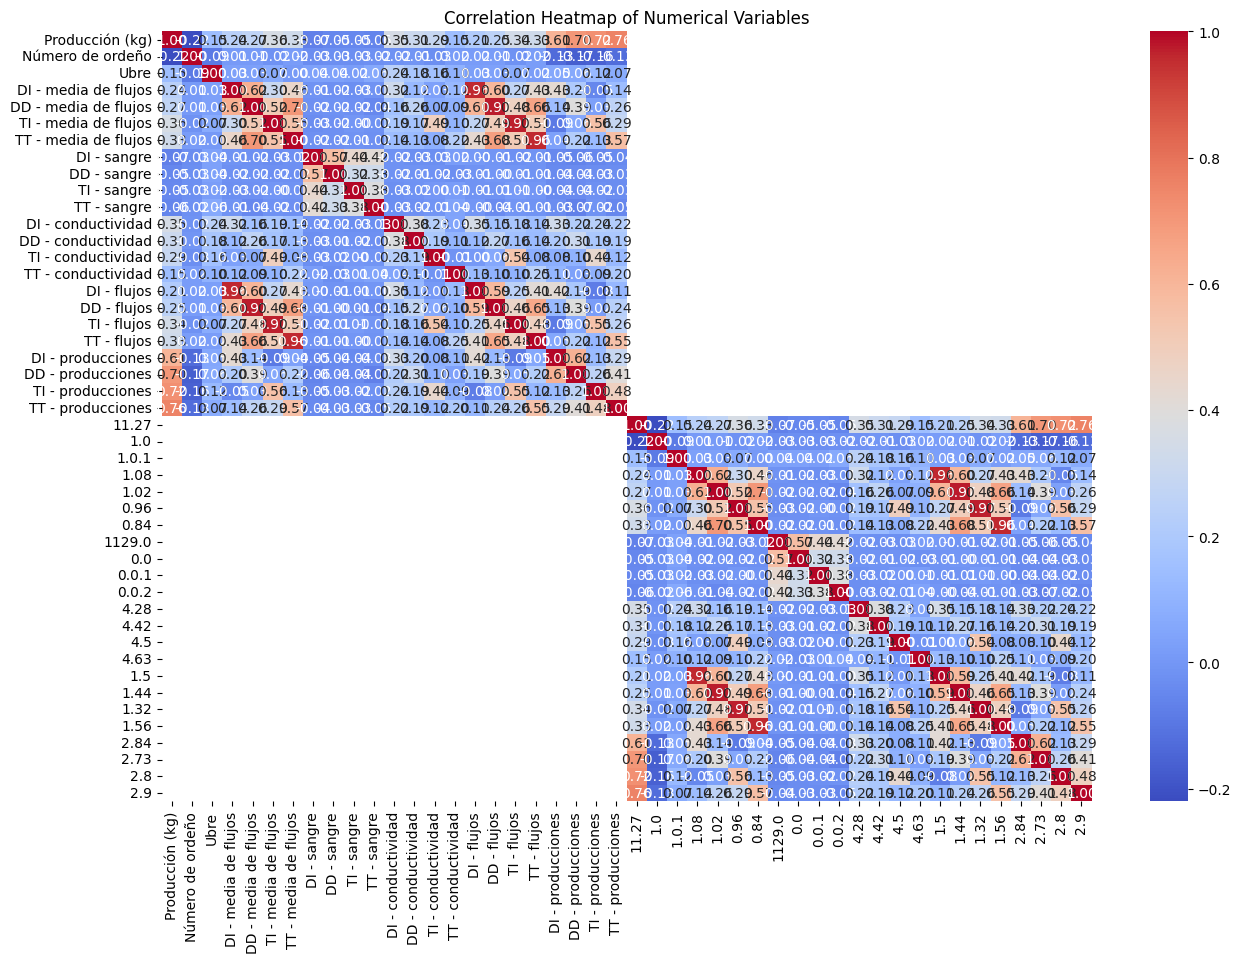

In [ ]:
# Select only numerical columns for correlation analysis, excluding boolean dummy variables
numerical_cols_for_corr = df_cleaned.select_dtypes(include=np.number).columns.tolist()
boolean_cols = df_cleaned.select_dtypes(include=bool).columns.tolist()
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in boolean_cols]


# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols_for_corr].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

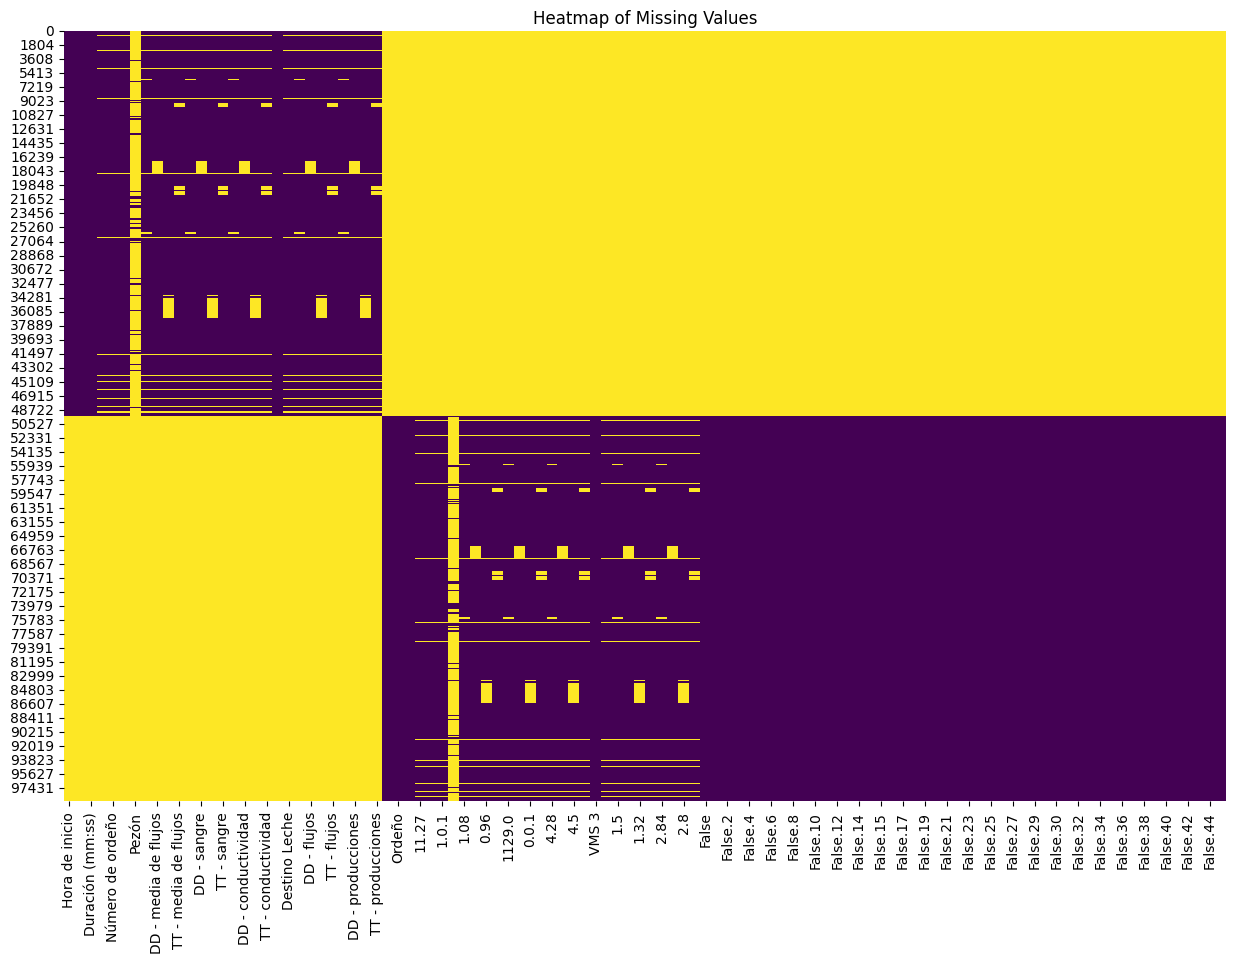

In [ ]:
# Exclude boolean columns from the heatmap
columns_for_heatmap = df_cleaned.select_dtypes(exclude=bool).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned[columns_for_heatmap].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
# Save the cleaned DataFrame to a new CSV file in Google Drive
output_path = '/content/drive/MyDrive/ConcentracionIA_bloque2/Vacas/Datos de ordeña/df_cleaned.csv'
df_cleaned.to_csv(output_path, index=False)

print(f"DataFrame guardado exitosamente en: {output_path}")

DataFrame guardado exitosamente en: /content/drive/MyDrive/ConcentracionIA_bloque2/Vacas/Datos de ordeña/df_cleaned.csv


##  **Definicion de variables predicitoras e indepndientes**
El heatmap te muestra la correlación entre las variables numéricas.
Por ejemplo, si tu heatmap tiene algo como:


>La variable Producción (kg) como variable objetivo (Y) porque representa la cantidad total de leche obtenida por evento de ordeña. Es el indicador más relevante para evaluar la productividad y eficiencia del sistema.


Usamos como variables predictores aquellas que influyen directamente en la producción viendo el mapa de correlacion y el mapa de calor:

* Duración (mm:ss) → tiempo de ordeña (relacionado con volumen producido)

* Número de ordeño → frecuencia o turno

* DI - media de flujos, DD - media de flujos, TI - media de flujos, TT - media de flujos → flujo promedio por cuarto de ubre

* DI - conductividad, DD - conductividad, TI - conductividad, TT - conductividad → indicativos de salud de la glándula mamaria

### **Selección de las variables**
Las variables que tienen correlación moderada o fuerte con Y en el heatmap.


In [ ]:
y = df_cleaned["Producción (kg)"]

features = [
    "Número de ordeño",
    "Duración (mm:ss)",
    "DI - media de flujos",
    "DD - media de flujos",
    "TI - media de flujos",
    "TT - media de flujos",
    "DI - conductividad",
    "DD - conductividad",
    "TI - conductividad",
    "TT - conductividad"
]

X = df_cleaned[features]


Debido a los NaN y al formato de tiempo, conviene limpiar antes:

In [ ]:
from sklearn.preprocessing import StandardScaler

df_model = df_cleaned.copy()

# Convertir "Duración (mm:ss)" a segundos
df_model["Duración_seg"] = (
    pd.to_timedelta("00:" + df_model["Duración (mm:ss)"]).dt.total_seconds()
)
# Reemplazar columna en la lista
X = df_model[
    [
        "Duración_seg",
        "Número de ordeño",
        "DI - media de flujos",
        "DD - media de flujos",
        "TI - media de flujos",
        "TT - media de flujos",
        "DI - conductividad",
        "DD - conductividad",
        "TI - conductividad",
        "TT - conductividad"
    ]
]
y = df_model["Producción (kg)"]

# Eliminar filas con valores nulos
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]
y = y[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
display(df_cleaned.head(30))

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,Pezón,DI - media de flujos,DD - media de flujos,TI - media de flujos,...,"Pezones no encontrados_DI,DD,TD","Pezones no encontrados_DI,DD,TI","Pezones no encontrados_DI,TD","Pezones no encontrados_DI,TI","Pezones no encontrados_DI,TI,TD",Pezones no encontrados_TD,Pezones no encontrados_TI,"Pezones no encontrados_TI,TD",Pezones no encontrados_Todos,Pezones no encontrados_nan
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,1.0,NaN,1.08,1.02,0.96,...,False,False,False,False,False,False,False,False,False,True
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,1.0,NaN,1.14,1.14,1.08,...,False,False,False,False,False,False,False,False,False,True
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,1.0,NaN,1.08,1.08,1.02,...,False,False,False,False,False,False,False,False,False,True
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,1.0,DD,1.14,1.02,1.02,...,False,False,False,False,False,False,False,False,False,True
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,1.0,NaN,1.20,1.08,1.14,...,False,False,False,False,False,False,False,False,False,True
5,07/10/2024 11:12 a. m.,Ordeño,09:18,13.15,1.0,1.0,NaN,1.14,1.20,0.90,...,False,False,False,False,False,False,False,False,False,True
6,08/10/2024 05:14 a. m.,Ordeño,06:18,9.08,1.0,1.0,TI,1.08,1.02,0.96,...,False,False,False,False,False,False,False,False,False,True
7,08/10/2024 04:09 p. m.,Ordeño,08:28,14.11,2.0,1.0,NaN,1.20,1.14,0.96,...,False,False,False,False,False,False,False,False,False,True
8,12/10/2024 03:19 p. m.,Ordeño,08:20,18.96,1.0,1.0,NaN,1.26,1.32,0.96,...,False,False,False,False,False,False,False,False,False,True
9,18/10/2024 03:10 p. m.,Ordeño,09:52,11.67,2.0,1.0,TI,1.20,1.20,1.08,...,False,False,False,False,False,False,False,False,False,True


## **Seleccion de Modelo atraves de Cross Validation**

In [ ]:
#Cargamos las bibliotecas necesarias para llevar acabo la validación cruzada
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

Al tener nuestras librerias ya seteadas, necesitamos poder encontrar una forma mas optima para poder evaluar nuestros datos, en este caso nosotros.

**Cross Validation** es una técnica utilizada para evaluar y comparar diferentes modelos de forma más confiable.
Podriamos deir que en lugar de hacer una sola división entre entrenamiento y prueba, el conjunto de datos se divide en **k** partes **(folds)**.

Podemos estimar el rendimiento promedio del modelo y reducir el sesgo asociado a una única división de los datos.

Y a su vez nos da pauta para poder comparar de manera mucho mas sencilla algortimos que podemos seleccionar para armar nuestro modelo como:

1.   Random Forest
2.   Linear Regression
3.   Lasso
4.   Ridge



In [ ]:
# K-Folds de 5 iteraciones
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Métricas
# Incluimos nuentras variables predictoras y dependientes
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# En la iteracion de los 5 folds estaremos calculando que tanto se ajusta el modelo y el error
scoring = {
    "r2": make_scorer(r2_score),
    "rmse": make_scorer(rmse, greater_is_better=False)  # sklearn busca maximizar; por eso negativo
}


Se utilizó validación cruzada k-fold con k=5, barajando las muestras, y fijando semilla de 42 como promedio.

En cada iteración, el modelo se entrena con 4 folds y se evalúa con el fold restante. Se reporta el promedio de R² y RMSE en validación.

A continuacion solo nos encargamos de definir los pipelines de los algortimos que vamos a usar

In [ ]:
# Pipelines que se guarda en models.items()
pipe_lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression()),
])

pipe_ridge = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", Ridge()),
])

pipe_lasso = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", Lasso(max_iter=10000)),
])

pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1)),
])

models = {
    "LinearRegression": pipe_lr,
    "Ridge": pipe_ridge,
    "Lasso": pipe_lasso,
    "RandomForest": pipe_rf,
}

In [ ]:
cv_results = []
for name, pipeline in models.items():
    cv = cross_validate(
        pipeline, X, y, cv=kf, scoring=scoring, return_train_score=False, n_jobs=-1
    )
    cv_results.append({
        "modelo": name,
        "r2_mean": np.mean(cv["test_r2"]),
        "r2_std": np.std(cv["test_r2"]),
        "rmse_mean": -np.mean(cv["test_rmse"]),  # lo hacemos positivo
        "rmse_std": np.std(-cv["test_rmse"]),
    })

cv_df = pd.DataFrame(cv_results).sort_values("r2_mean", ascending=False)
cv_df.round(4)

,modelo,r2_mean,r2_std,rmse_mean,rmse_std
3,RandomForest,0.7080,0.0045,2.8488,0.0127
1,Ridge,0.4866,0.0068,3.7779,0.0155
0,LinearRegression,0.4866,0.0068,3.7779,0.0155
2,Lasso,0.2388,0.0025,4.6002,0.0351


Se compararon modelos base (Regresión Lineal, Ridge, Lasso, Random Forest).
Posteriormente ajustamos hiperparámetros del mejor modelo en este caso seria solo el Random Forest con GridSearchCV pues al final del dia su R² fue la que mejor se ajusto, aparte de se que si eerror estandar es el mas bajo de todos los modelos

>Debemos que tener en cuenta que a pesar de que el error estandar de Ridge o Linear Regression sea mayor solo por un poco, debemos que tener en cueta que su error cuadrado (rmse_mean) es considerablemente mas alto, lo que nos indica que el modelo es variable a datos nuevos

Por eso mismo por y error estandar muy bajo es que nos decantamos mejor por nuestro **Random Forest**, este mismo puede refinarse mediante **GridSearchCV**, ajustando sus hiperparámetros para mejorar la precisión y estabilidad.

In [ ]:

# Tuning de RandomForest
param_grid_rf = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5],
}
gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    scoring="r2",
    cv=kf,
    n_jobs=-1
)
gs_rf.fit(X, y)

pd.DataFrame([
    {"modelo": "RandomForest (GS)", "best_r2": gs_rf.best_score_, "best_params": gs_rf.best_params_}
]).round(4)


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,modelo,best_r2,best_params
0,RandomForest (GS),0.7106,"{'model__max_depth': None, 'model__min_samples..."


Podemos ver que al usar el GridSearchCV, solo tenemos una mejor de 0.7033 -> 0.7106, esto realmente no tiene una mejor tan significativa como esperaraiamos, pero de igual forma seguiremos validando que ota tecnica para calcular hiperparametros nos podria ayudar a tener mejor significancia.

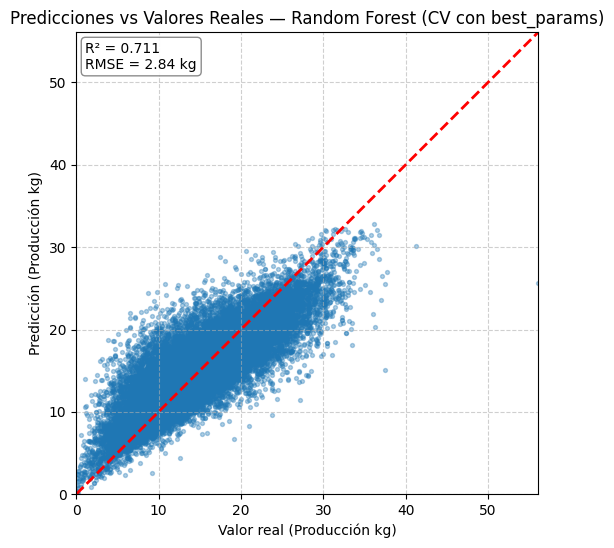

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

# 1) Mejor estimador del GridSearch ya entrenado
best_rf = gs_rf.best_estimator_

# 2) Predicciones con validación cruzada (mismo kf que usaste)
y_pred = cross_val_predict(best_rf, X, y, cv=kf, n_jobs=-1)

# 3) Métricas globales
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# 4) Scatter Predicho vs Real
plt.figure(figsize=(7, 6))
plt.scatter(y, y_pred, s=8, alpha=0.35)

# Línea y = x y ejes “cuadrados”
vmin = float(min(y.min(), y_pred.min()))
vmax = float(max(y.max(), y_pred.max()))
plt.plot([vmin, vmax], [vmin, vmax], 'r--', linewidth=2)
plt.xlim(vmin, vmax)
plt.ylim(vmin, vmax)
plt.gca().set_aspect('equal', adjustable='box')

plt.title("Predicciones vs Valores Reales — Random Forest (CV con best_params)")
plt.xlabel("Valor real (Producción kg)")
plt.ylabel("Predicción (Producción kg)")
plt.grid(True, linestyle='--', alpha=0.6)

# Cuadro con métricas
plt.text(
    0.02, 0.98,
    f"R² = {r2:.3f}\nRMSE = {rmse:.2f} kg",
    transform=plt.gca().transAxes,
    va='top', ha='left',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9)
)
plt.show()

